In [ ]:
# default_exp interactive_session

# Interactive session 

## Challenge 1: Define the experiment.
First we define how the experiment works.  Here, we will simulate a two-armed bandit experiment.  In the two-armed bandit task participants repeatedly choose between two stimuli. Each stimulus has a certain <b>reward probability</b>.  Participants complete several <b>trials</b> and their goal is to maximize <b>rewards</b>.

### Step 1:  Define the number of trials and reward probabilities.
First, we have to decide on the number of trials and the reward probabilities for each stimulus.  Store the number of trials in a variable `Tr` and store the reward probabilities (one for each of the two stimuli) in variable `mu`.
> Note: You can define these parameters however you want.  In the Collins paper there were 100 trials and the reward probabilities were .2 for one stimulus and .8 for the other.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [39]:
Tr = 100
mu = c(.2, .8)

### Step 2: Write the reward function.
The reward function allocates reward stochastically based on reward probabilities. This function uses an action and the reward probabilities as inputs and returns either a reward of 1 or no reward (0).  

It achieves this by generating a random number from a uniform distribution ranging from 0 and 1 (in R you can do this using `runif(1, min=0, max=1)`).

Next, it compares the reward probability associated with the chosen action `mu[action]` to that number.  If it is lower or equal `<=` to the reward probability it returns 1 (reward) otherwise it returns 0 (no reward).

> Note, in R you implement functions by writing:
```
allocate_reward = function(action, mu){ # choice and mu are your inputs
    ...
    return(reward) # reward is your return value
    }
```
> You implement if statements, by writing:
```
if(...){
    ...}
else{
    ...}
```

[1] TRUE

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [47]:
allocate_reward = function(action, mu){
    rand = runif(1, min=0, max=1) # Chooses float from continuous uniform distribution between 0 and 1
    if(rand <= mu[action]){ # If the random number is smaller than the chosen reward probability
        return(1)} # reward allocated
    else{
        return(0)}
}

## Challenge 2: Set up your first behavioral model (Rescorla-Wagner).
The Rescorla-Wagner model consists of a softmax choice rule and a Q-learning update algorithm.  Initially, the model does not know which action is the best choice, so both actions should have the same Q-value.

### Step 1: Initialize your Q-values
In this step you define the initial Q-values. Store them in a variable `Q`.

> Note: We will need to run some calculations with these Q-values.  To allow for this you'll have to place your Q-values into a vector `c(...,...)`.  The initial values should not matter much, but Collins et al. set them to .5.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [48]:
Q = c(0.5, 0.5)

### Step 2: Implement the softmax function.
The softmax function determines <b>choice probabilities</b> based on Q-values using the following formula:

$p_a = \dfrac{exp(Q_{at}*beta)} {\Sigma{exp(Q_{at}*beta)}}$

As you can see, this function also introduces our first participant parameter the<b> inverse temperature (beta)</b>.  The larger beta the more deterministic (less random) a person's choices are.

> Bonus Question: What else does this function do, next to introducing beta?

#### 2.2 Define beta
First define beta and store it in the variable `beta`.  Here you can pick any positive value (we chose 4).

> Bonus Question: Why does beta need to be positive?

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [49]:
beta = 4

#### 2.3 Implement the softmax function.
> Note, remember in R you implement functions by writing:
```
softmax = function(Q, beta){ # Q and beta are your inputs
    ...
    return(p) # p is your return value
    }
```

> To exponentiate an array you use `exp()` and to calculate the sum of a vector, you use `sum()`.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [50]:
softmax = function(Q, beta){
    p = exp(Q*beta) / sum(exp(Q*beta))
    return(p)
    }

In [51]:
softmax(Q, beta)

[1] 0.5 0.5

### Step 3: Write a decision function.
This function uses choice probabilities as an input and returns a concrete choice as an output.  It achieves this by first generating a random number from a uniform distribution ranging from 0 and 1 (in R you can do this using `runif(1, min=0, max=1)`).

Next, it compares the first choice probability to this number.  If it is lower or equal to the choice probability the chosen action is 1 (1st slot machine), else the chosen action is 2 (2nd slot machine).

> Note: Call this function `choose = function()`.  You will need an if statement.  Remember, in R, you define this as:
```
if(...){
    ...}
else{
    ...}
```

<i>Enter your code here:</i>

In [ ]:
choose = function(p){
    rand = runif(1, min = 0, max = 1)
    if(rand <= p[1]){
        action = 1}
    else{
        action = 2}
    return(action)
    }

<i>Check the solution below:</i>

In [52]:
choose = function(p){
    rand = runif(1, min=0, max=1) # Chooses float from continuous uniform distribution between 0 and 1
    if(rand <= p[1]){ # If the random number is smaller than our first p
        chosen_action = 1} # ... the first option was chosen
    else{
        chosen_action = 2}
    return(chosen_action)
}

### Step 4: Write the update function
The update function updates Q-values based on the reward, according to this formula:
$Q_{a,t+1} = Q_{a,t} + \alpha (r - Q_{a,t})$

As you can see, this function introduces another participant parameter: the <b>learning rate (alpha)</b>.

#### 4.1 Define alpha
Pick a value between 0 and 1 (we chose .2) and store it as `alpha`.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [53]:
alpha = .2

#### 4.2: Write the update function
Call this function `update_q_value()` with `Q`, `action`, `reward`, and `alpha` as inputs and `updated_q` and `delta` as outputs.  This function first calculates the prediction error and then updates Q.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [54]:
update_q = function(Q, action, reward, alpha){
    delta = reward - Q[action] # prediction error
    Q[action] = Q[action] + alpha * delta
    return(list(Q, delta))
    }

### Step 5: Putting it all together
Congratulations, you created all the components of your simulation function.  Now let's put them all together and simulate some data.  The simulation function (call it `simulate_M3RescorlaWagner_v1`) takes the experiment parameters, `mu` and `Tr`, as well as the participant parameters `alpha` and `beta` as inputs.

> Note: Don't forget to initialize the q-values as we did in step 2.1.

In each trial, we simulate an action chosen by the participant, allocate a reward, and update the participant's q-values accordingly.

> Note: In R you write loops like this:
```
for(t in c(1:Tr)){
    ...}
```



As outputs it returns the lists (i.e., vectors) `actions`, `rewards`, `Qs`, and `deltas` for each trial.

> Note: You create vectors like this `actions = []` and add data to a vector like this: `actions=(actions, action)`.

> Warning: For technical reasons, you have to initialize the vectors before appending, like: `actions = NULL`



<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [55]:
starting_q_values = c(0.5, 0.5)
simulate_M3RescorlaWagner_v1 = function(Tr, mu, alpha, beta, starting_q_values){
    Q = starting_q_values # Q are the Q-values the participant currently holds for each action
    Qs = NULL
    deltas = NULL
    actions = NULL # the participants actions
    rewards = NULL # the rewards received by the participant
    
    # Looping through trials
    for(t in c(1:Tr)){ 
        Qs=c(Qs, Q)
        p = softmax(Q, beta) # The probability with which a participant choses each action
        action = choose(p) # The choice of the participant based on the choice probabilities
        actions=c(actions,action) 
        reward = allocate_reward(action, mu) # The reward determined by the game for the action the participant chose
        rewards=c(rewards,(as.integer(reward)))
        list_update = update_q(Q, action, reward, alpha)
        deltas=c(deltas,list_update[[2]])
        Q = list_update[[1]]
    }
    return(list(actions, rewards, Qs, deltas))
}        

## Challenge 3: Explore the parameters
We already wrote you a little function that simply uses your `simulate_M3RescorlaWagner_v1` function to simulate an experiment based on your parameters and plots its outputs in a figure. Below, we will go through some parameter combinations and explore their effects.

In [56]:
library(ggplot2)

In [86]:
plot_rescorla_game = function(Tr, mu, alpha, beta){
  sim_list = simulate_M3RescorlaWagner_v1(Tr, mu, alpha, beta, starting_q_values)

  actions = sim_list[[1]]
  rewards = sim_list[[2]]
  Qs = sim_list[[3]]
  deltas = sim_list[[4]]
  type = rep(c("Q1", "Q2"),length(Qs)/2)
  df_Qs = data.frame(values=Qs, type, trial = rep(c(1:Tr),each = 2))
  df_pe = data.frame(values=deltas, type="pe", trial = c(1:Tr))
  df = rbind(df_Qs, df_pe)
  plot = ggplot(df, aes(x = trial, y = values, group = type, color = type))+geom_line(size = 1.5)+
    ylim(-1,1)+
    theme_classic()+
    theme(axis.title = element_text(size = 20, face = "bold")
          , axis.title.y = element_text(vjust=2.0)
          , axis.text.x = element_text(size = 20)
          , axis.text.y = element_text(size = 20)
          , strip.text.x = element_text(size=20, face = "bold")
          , legend.title=element_blank()
          , legend.text=element_text(size=20)
          , axis.title.x=element_blank())
  return(plot)
}

Here are some example parameter values:

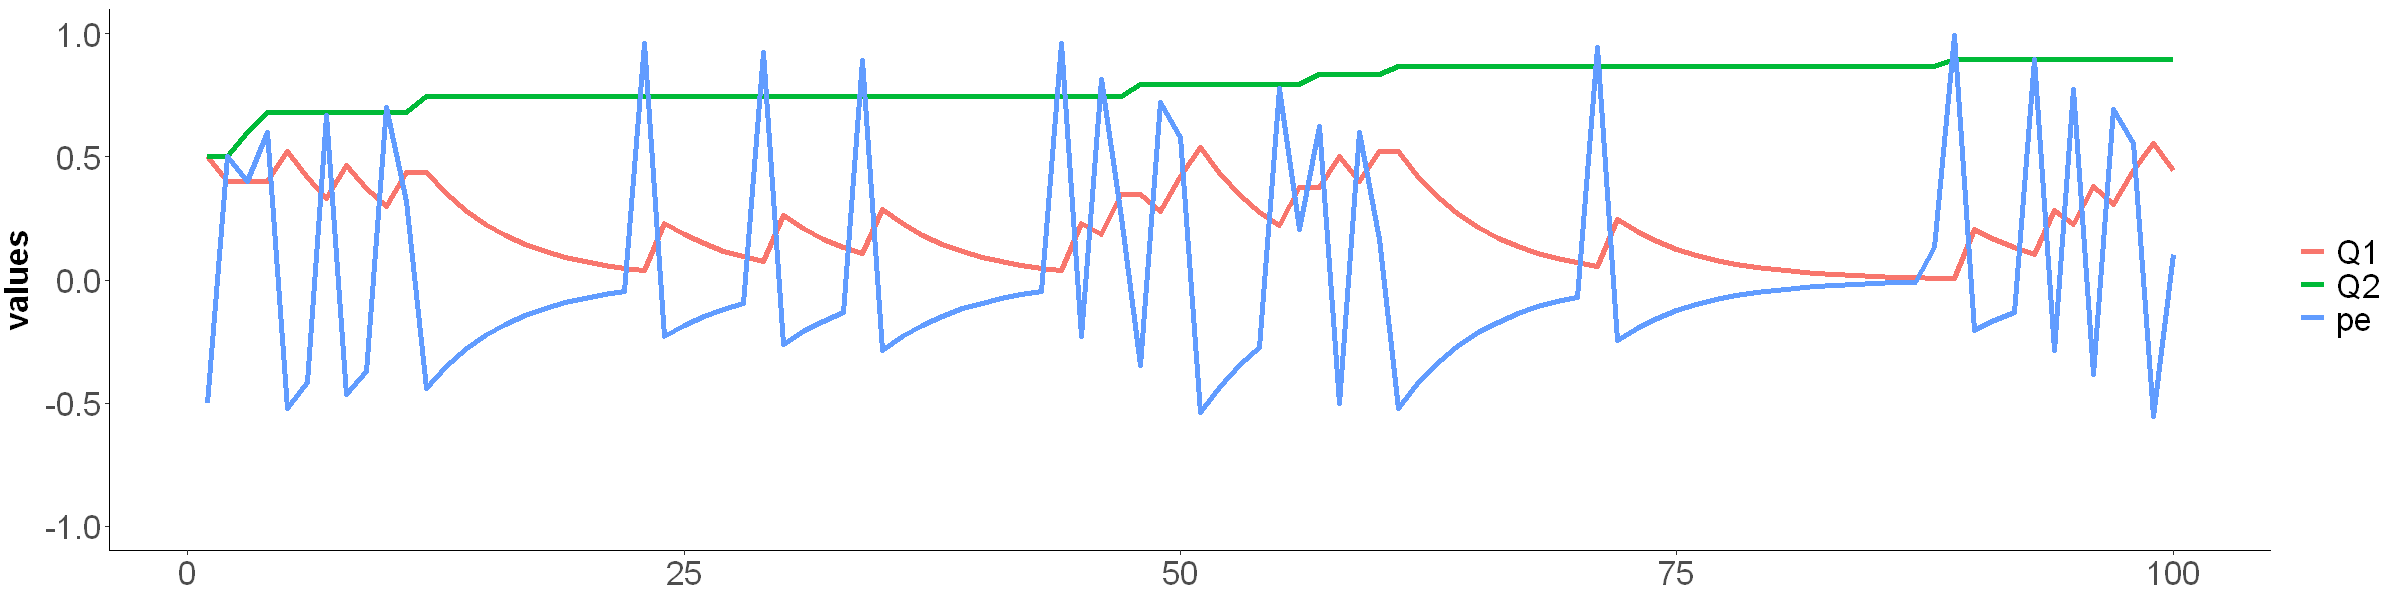

In [61]:
Tr = 100 # number of trials
mu = c(.2,.8) # reward probabilities
alpha = .2 # learning rate
beta = -4 # inverse temperature
plot_rescorla_game(Tr, mu, alpha, beta)
options(repr.plot.width=20, repr.plot.height=5)

> Reducing the learning rate (participant does not manage to learn probabilities)

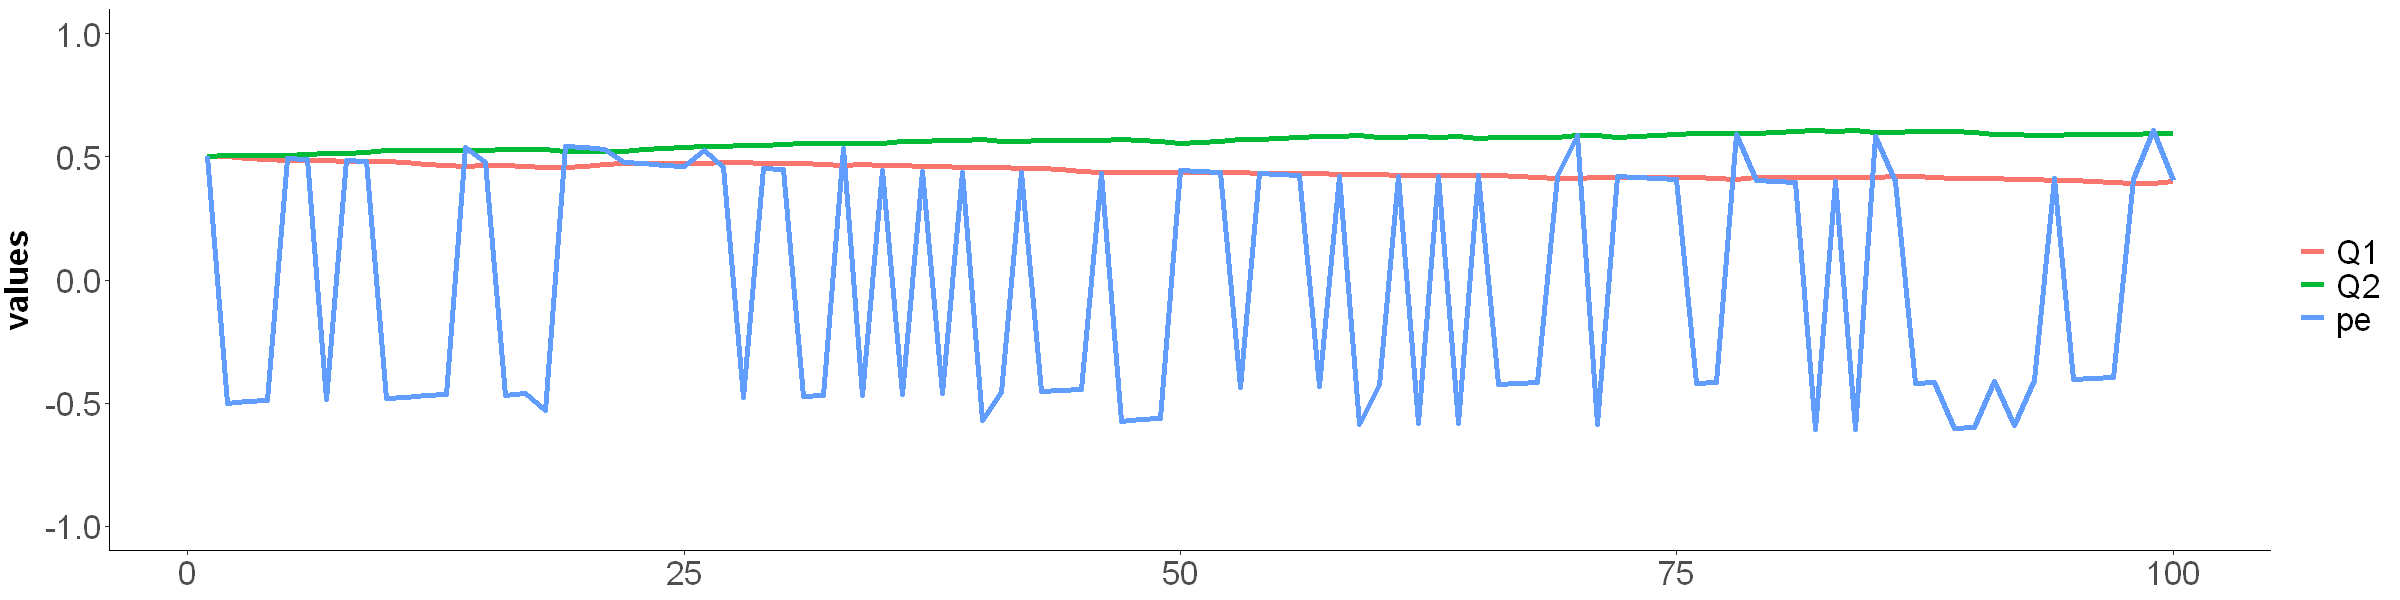

In [60]:
Tr = 100 # number of trials
mu = c(.2,.8) # reward probabilities
alpha = .01 # learning rate
beta = 4 # inverse temperature
plot_rescorla_game(Tr, mu, alpha, beta)

> Let's give them more trials

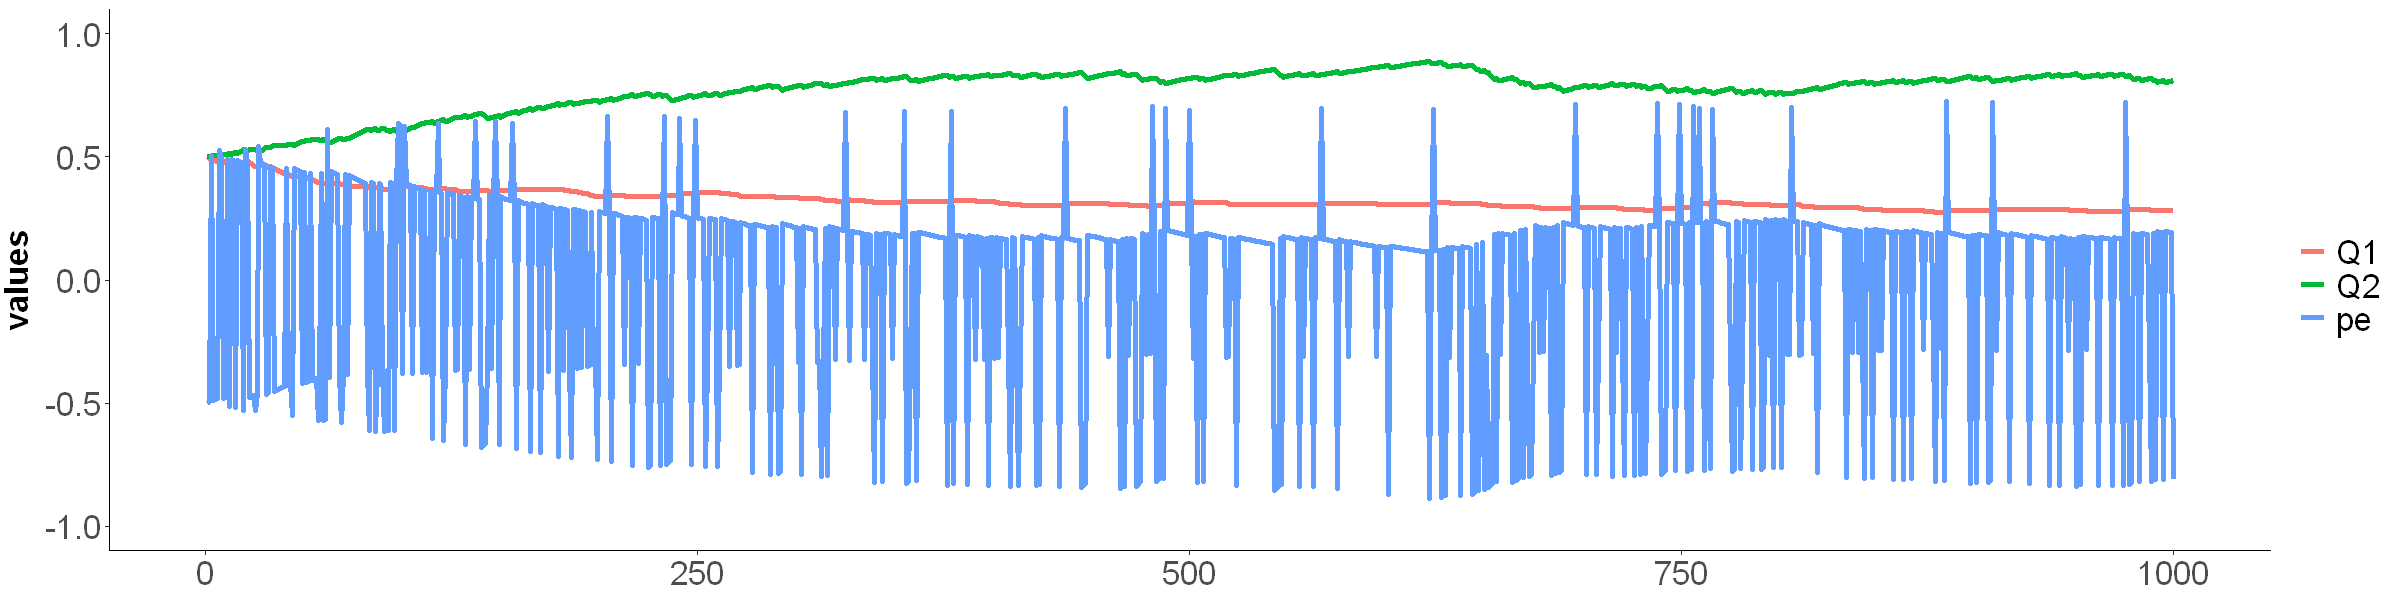

In [62]:
Tr = 1000 # number of trials
mu = c(.2,.8) # reward probabilities
alpha = .01 # learning rate
beta = 4 # inverse temperature
plot_rescorla_game(Tr, mu, alpha, beta)

> An extreme beta value makes participants stop exploring.

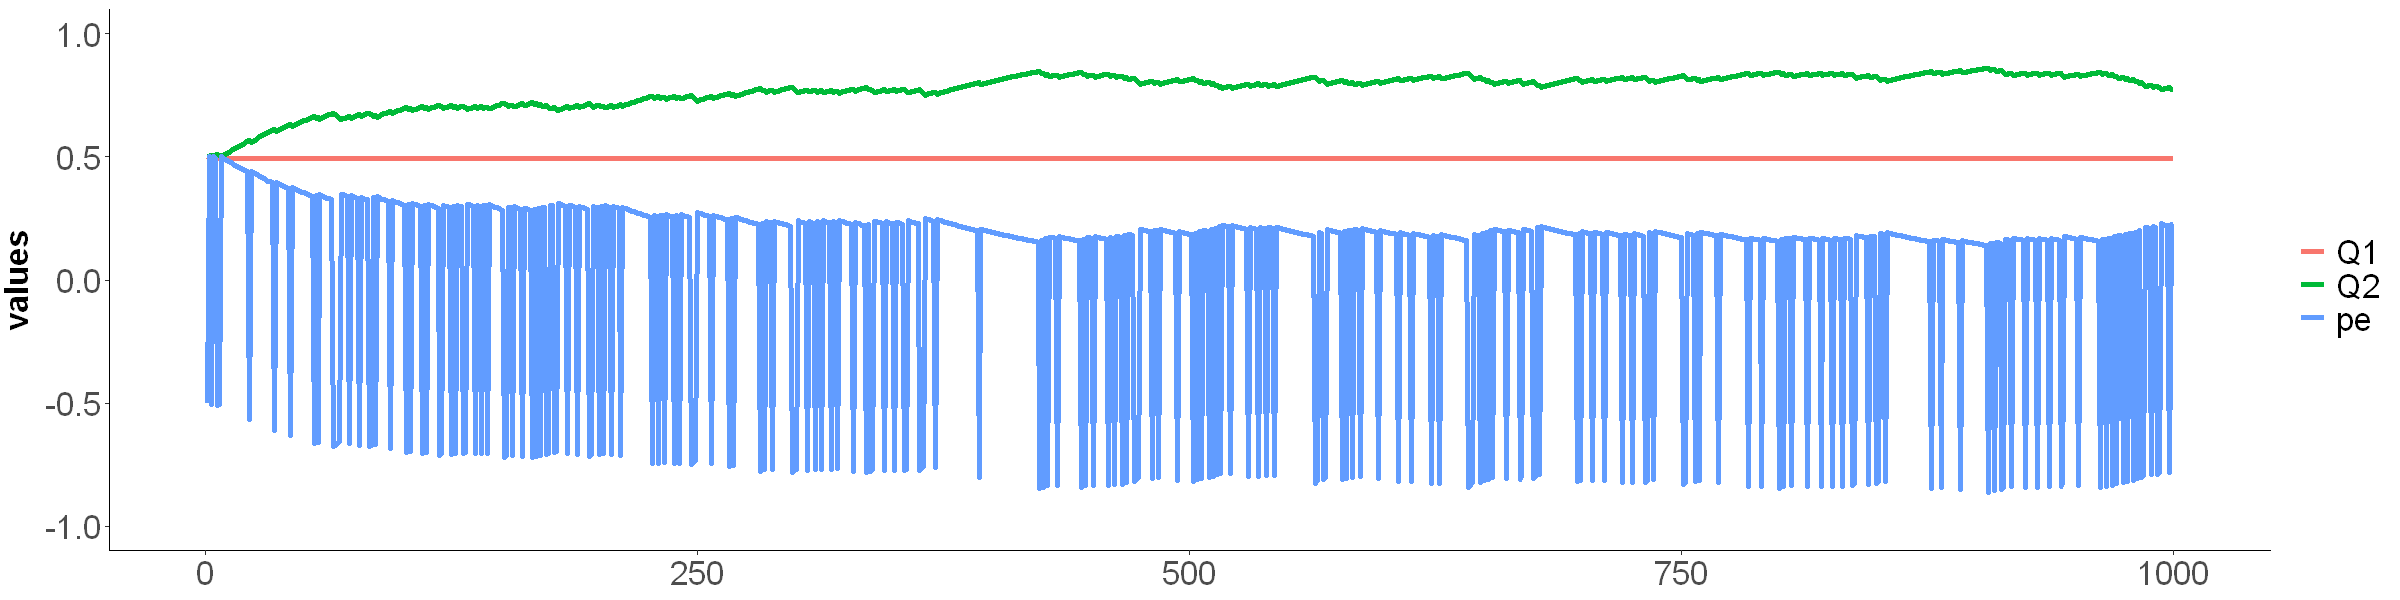

In [63]:
Tr = 1000 # number of trials
mu = c(.2,.8) # reward probabilities
alpha = .01 # learning rate
beta = 1000 # inverse temperature
plot_rescorla_game(Tr, mu, alpha, beta)

> If beta is very low, participants still learn, but they don't use that knowledge (something that we cannot see in this plot yet).

In [ ]:
Tr = 1000 # number of trials
mu = c(.2,.8) # reward probabilities
alpha = .1 # learning rate
beta = 0.0000000001 # inverse temperature
plot_rescorla_game(Tr, mu, alpha, beta)

## Challenge 4: Choice Kernel
The only difference between choice kernel and rescorla-wagner is that the softmax function takes choice_kernel values instead of Q-values as inputs and the update function is indendent of rewards.  Therefore, we only need to change the update function.

### Step 1: Write a new update function
The formula of the update function looks like this:

$CK_{a,t+1} = CK_{a,t} + \alpha * 1$

Before the choice kernel is updated, both choice kernels decay with the inverse of the learning rate:

$CK_{t+1} = CK_{t} * (1 - \alpha) $


Call this function `update_choice_kernels`, with the inputs `choice_kernel`, `action`, and `alpha`.

> Note: If you're confused by the multiplication with one: This is only for comparability with the Rescorla-Wagner.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [79]:
update_choice_kernels = function(choice_kernel, action, alpha){
   # choice_kernel = (1 - alpha) * choice_kernel
    choice_kernel[action] = choice_kernel[action] + alpha * 1
    return(choice_kernel)
    }

In [82]:
choice_kernel = c(0.5,0.6)
update_choice_kernels(choice_kernel, 1, 0.2)

[1] 0.7 0.6

### Step 2: Putting it all together.
Now make a `simulate_M4ChoiceKernel_v1` function similar to the rescorla wagner function but with our new update function and choice kernels instead of Qs.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [83]:
simulate_M4ChoiceKernel_v1 = function(Tr, mu, alpha_c, beta_c){
    choice_kernel = c(0,0) # choice_kernel are the choice_kernel-values the participant currently holds for each action
    choice_kernels = NULL
    actions = NULL # the participants actions
    rewards = NULL # the rewards received by the participant
    # Looping through trials
    for(t in c(1:Tr)){ 
        choice_kernels=c(choice_kernels, choice_kernel)
        p = softmax(choice_kernel, beta) # The probability with which a participant choses each action
        action = choose(p) # The choice of the participant based on the choice probabilities
        actions=c(actions,action) 
        reward = allocate_reward(action, mu) # The reward probability determined by the game for the action the participant chose
        rewards=c(rewards,(as.integer(reward)))
        choice_kernel = update_choice_kernels(choice_kernel, action, alpha)
    }
    return(list(actions, rewards, choice_kernels))
}

> Note that choice_kernel decays with the inverted alpha in each trial `choice_kernel = (1 - alpha_c) * choice_kernel`

## Challenge 5: Explore the parameters of your choice kernel simulations

In [87]:
plot_choice_kernel_game = function(Tr, mu, alpha, beta){
  sim_list = simulate_M4ChoiceKernel_v1(Tr, mu, alpha, beta)

  actions = sim_list[[1]]
  rewards = sim_list[[2]]
  CKs = sim_list[[3]]
  type = rep(c("CK1", "CK2"),length(CKs)/2)
  df_CKs = data.frame(values=CKs, type, trial = rep(c(1:Tr),each = 2))
  df_action = data.frame(type = as.character(actions), values = -0.1, trial = c(1:Tr))
  plot = ggplot(df_CKs, aes(x = trial, y = values, group = type, color = type))+geom_line(size = 2)+
    #ylim(-0.2,1)+
    theme_classic()
  plot=plot+geom_point(data = df_action, size = 3)+
    theme(axis.title = element_text(size = 20, face = "bold")
          , axis.title.y = element_blank()
          , axis.title.x=element_text(size = 20)
          , axis.text.x = element_text(size = 20)
          , axis.text.y = element_text(size = 20)
          , legend.title=element_blank()
          , legend.text=element_text(size=20)
          )
  plot =  plot+scale_color_manual(breaks = c("CK1", "CK2", 1, 2),
                        values=c("orange", "blue", "orange", "blue"))
  return(plot)
}

In [ ]:
# why do choice kernel values go to different directions ???

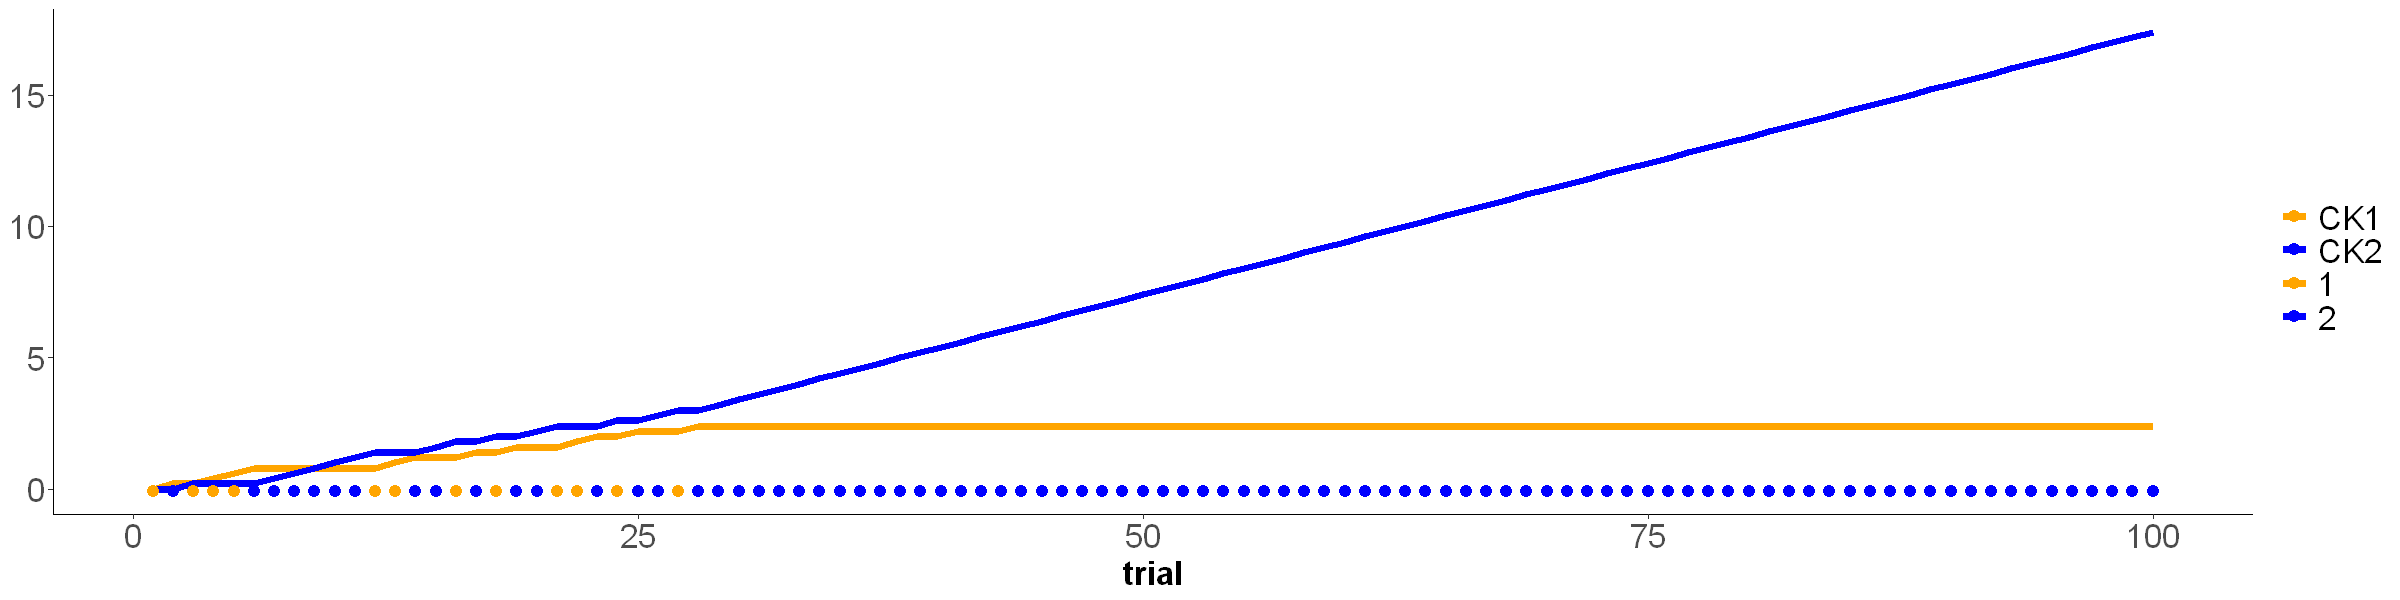

In [89]:
Tr = 100 # number of trials
mu = c(.2,.8) # reward probabilities
alpha = .2 # learning rate
beta = 1 # inverse temperature
plot_choice_kernel_game(Tr, mu, alpha, beta)

In [ ]:
Tr = 100 # number of trials
mu = c(.2,.8) # reward probabilities
alpha = .2 # learning rate
beta = .004 # inverse temperature
plot_choice_kernel_game(Tr, mu, alpha, beta)

In [ ]:
Tr = 500 # number of trials
mu = c(.2,.8) # reward probabilities
alpha = .2 # learning rate
beta = 4 # inverse temperature
plot_choice_kernel_game(Tr, mu, alpha, beta)

> With a reasonably high beta one of the options should always move towards 1.

# Reproducing Collins' figures
![alt text](images/wilson_figure.png "Title")

## Challenge 6: Reproducing Panel A
Panel A shows the different in the probability of sticking to the same action (y-axis) depending on whether the last trial was a win or a loss (x-axis), split up by learning model (colors).  Here, we will only focus on the Rescorla-Wagner and the Choice Kernel model.

### Step 1
Write a fuction that first defines last_action and last_reward.  Then determines whether a trial was a stay or switch trial.  Finally it calculates the proportion of stay trials depending on whether the last trial was rewarded or not rewarded and outputs the score for each case.

> You can use `data.table::shift(df$action)` to create variables that represent the value of the last row.  

In [ ]:
analysis_WSLS_v1 = function(df){
    # Shifting data back by one
    df$last_action = data.table::shift(df$action)
    df$last_reward = data.table::shift(df$reward)
    # Deciding whether trial is stay trial
    df$stay = 0
    df$stay[df$last_action == df$action] = 1
    # Calculating mean stay by case and outputing as series
    loseStay = mean(df$stay[df$last_reward == 0],na.rm=TRUE)
    winStay = mean(df$stay[df$last_reward == 1],na.rm=TRUE)
    s = c(loseStay, winStay)
    return(s)
}

### Step 2
Simulate data for 110 participants using the Rescorla-Wagner model and store their proportion of stay trials depending on the last trial's reward in a dataframe.  Finally, you calculate the mean proportion of stay trials (for wins and losses) over all participants (call the variable `rw`), which we will use in the plot.

For this, we will use the same experiment and participant parameters as Collins, below: 

In [ ]:
Tr = 100 
mu = c(.2,.8)
alpha = .1
beta = 5
participants = 110

> Note: To turn the actions and rewards into a dataframe, you can use `df = data.frame(action = sim_list[[1]], reward = sim_list[[2]])`.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [ ]:
alpha = .1 # learning rate
beta = 5 # inverse temperature
participants = 110
data = data.frame()
for(i in c(1:participants)){
    sim_list = simulate_M3RescorlaWagner_v1(Tr, mu, alpha, beta, starting_q_values)
    df = data.frame(action = sim_list[[1]], reward = sim_list[[2]])
    data= rbind(data,
                data.frame(pstay = analysis_WSLS_v1(df), 
                           type = c("loseStay", "winStay"),
                           model = "rw"))
    }

rw = aggregate(pstay~type+model, data, FUN = mean)
rw

### Step 3
Now do the same for the choice kernel and call the variable `ck`.  Note that for this, Collins changed beta to 3.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [ ]:
alpha = .1 # learning rate
beta = 3 # inverse temperature
participants = 110
data = data.frame()
for(i in c(1:participants)){
    sim_list = simulate_M4ChoiceKernel_v1(Tr, mu, alpha, beta)
    df = data.frame(action = sim_list[[1]], reward = sim_list[[2]])
    data= rbind(data,
                data.frame(pstay = analysis_WSLS_v1(df), 
                           type = c("loseStay", "winStay"),
                           model = "ck"))
    }

ck = aggregate(pstay~type+model, data, FUN = mean)
ck

### Step 4
We plot everything together.

In [ ]:
df_a = rbind(rw, ck)
df_a

In [ ]:
plot_a = ggplot(df_a, aes(x = type, y = pstay, group = model, color = model))+geom_line(size = 1.5)+geom_point(size = 5)+
theme_classic()+ylim(0,1)+ylab("p(stay)")+xlab("previous trial")+
theme(axis.title = element_text(size = 14, face = "bold")
          , axis.text.x = element_text(size = 10)
          , axis.text.y = element_text(size = 10)
          , legend.title=element_blank()
          , legend.text=element_text(size=14)
          )
options(repr.plot.width=4, repr.plot.height=3)
plot_a

## Challenge 7: Reproducing Panel B
To create Panel B, we simulate the proportion of correct choices (y-axis) split by different values of alpha (x-axis) and beta (colors), split by early (first ten) and late (last ten) trials (subpanels).  These are the alphas and betas that Collins uses for this plot:

In [ ]:
alphas = seq(.02,1,by= .02)
betas = c(1,2,5,10,20)
length(alphas)*length(betas)*2

### Step 1
Write a nested loop that loops through 200 simulations, all alphas, and all betas.  In each iteration it simulates data using the Rescorla-Wagner model and outputs the proportion of correct choices (a choice is correct when the stimulus that is more likely to return a reward is picked) in the first and last ten trials.

> Note: To store the output first make a `df` data frame and in each iteration make a `session_df` data frame which you append to the data.

> Note: To get the correct action (i.e. the action associated with the highest reward probability, us `which.max(mu)`.

> Note: Collins runs 1000 simulations, but because our code runs a bit slow, we recommend doing this 200 per alpha beta combination.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [ ]:
starting_q_values = c(0.5,0.5)
df = data.frame()
for(i in c(1:200)){
    for(alpha in alphas){
        {for(beta in betas){
            sim_list = simulate_M3RescorlaWagner_v1(Tr, mu, alpha, beta, starting_q_values)                                        
            actions = sim_list[[1]]
            imax = which.max(mu) # Mu max index
            early = head(actions,10)
            correct_early = length(early[early == (imax)])/length(early)
            late = tail(actions,10)
            correct_late = length(late[late == (imax)])/length(late)
            session_df_early = data.frame(alpha=alpha, beta = beta, correct = correct_early, type = "early trials", index = i)
            session_df_late = data.frame(alpha=alpha, beta = beta, correct = correct_late, type = "late trials", index = i)
            session_df = rbind(session_df_early, session_df_late)
            df = rbind(df, session_df)
            }
         }}}

In [ ]:
df_variation = df
df_b = aggregate(correct~type+beta+alpha, df_variation, FUN = mean)
df_b$beta = as.character(df_b$beta)

![alt text](images/wilson_figure.png "Title")

### Step 2 
Let's plot this all together.

> Note: You can use `facet_wrap(~...)` to split the figure into multiple plots based on a variable; you can use `geom_line()` to make nice lineplots; to choose a color palette, you can use some extra packages (we already chose `viridis` --> `scale_color_viridis(discrete = TRUE, option = "D")`).

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [ ]:
library("viridis")     

In [ ]:
plot_b = ggplot(df_b, aes(x = alpha, y = correct, color = beta, group = beta)) + 
geom_line(size = 0.9) + facet_wrap(~type, scales = "free")+
theme_classic()+ylab("correct (%)")+
theme(axis.title = element_text(size = 11)
          , axis.text.x = element_text(size = 10)
          , axis.text.y = element_text(size = 10)
          , legend.text=element_text(size=11)
          )+
scale_color_viridis(discrete = TRUE, option = "D")
options(repr.plot.width=7, repr.plot.height=3)
plot_b

# Well done! :)

## Bonus Challenge: Combine all plots to make them look exactly as Collins'.

<i>Enter your code here:</i>

<i>Check the solution below:</i>

In [ ]:
# No solution, you're on your own :p